In [93]:
import os, sys
# Set absolute path to the root folder of the directory
full_path = os.getcwd()
home_folder = 'CPS_GradRate_Analysis'
root = full_path.split(home_folder)[0] + home_folder + '/'
sys.path.append(root)

%load_ext autoreload
%autoreload 2

from src.preprocessing_schoolid import SchoolYear

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


One choice I will make is to perform EDA after the train test split.

In [94]:
sy_1819 = SchoolYear('../../data/chicago_data_portal_csv_files/Chicago_Public_Schools_-_School_Profile_Information_SY1819.csv',
                     '../../data/chicago_data_portal_csv_files/.ipynb_checkpoints/Chicago_Public_Schools_-_School_Progress_Reports_SY1819-checkpoint.csv')

In [95]:
sy_1819.isolate_high_schools()
sy_1819.drop_no_gr_schools()
sy_1819.drop_no_student_schools()
sy_1819.make_percent_low_income()

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name_sp,Long_Name_sp,Primary_Category_sp,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,Summary,Administrator_Title,Administrator,Secondary_Contact_Title,Secondary_Contact,Address_sp,City_sp,State_sp,Zip_sp,Phone_sp,Fax_sp,CPS_School_Profile_sp,Website_sp,Facebook,Twitter,Youtube,Pinterest,Attendance_Boundaries,Grades_Offered_All,Grades_Offered,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Statistics_Description,Demographic_Description,Dress_Code,PreK_School_Day,Kindergarten_School_Day,School_Hours,Freshman_Start_End_Time,After_School_Hours,Earliest_Drop_Off_Time,Classroom_Languages,Bilingual_Services,Refugee_Services,Title_1_Eligible,PreSchool_Inclusive,Preschool_Instructional,Significantly_Modified,Hard_Of_Hearing,Visual_Impairments,Transportation_Bus,Transportation_El,Transportation_Metra,School_Latitude_sp,School_Longitude_sp,Average_ACT_School,Mean_ACT,College_Enrollment_Rate_School,College_Enrollment_Rate_Mean,Graduation_Rate_School,Graduation_Rate_Mean,Overall_Rating,Rating_Status,Rating_Statement,Classification_Description,School_Year,Third_Contact_Title,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Network,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date,Short_Name_pr,Long_Name_pr,School_Type,Primary_Category_pr,Address_pr,City_pr,State_pr,Zip_pr,Phone_pr,Fax_pr,CPS_School_Profile_pr,Website_pr,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,Healthy_School_Certification_Description,Creative_School_Certification,Creative_School_Certification_Description,NWEA_Reading_Growth_Grade_3_Pct,NWEA_Reading_Growth_Grade_3_Lbl,NWEA_Reading_Growth_Grade_4_Pct,NWEA_Reading_Growth_Grade_4_Lbl,NWEA_Reading_Growth_Grade_5_Pct,NWEA_Reading_Growth_Grade_5_Lbl,NWEA_Reading_Growth_Grade_6_Pct,NWEA_Reading_Growth_Grade_6_Lbl,NWEA_Reading_Growth_Grade_7_Pct,NWEA_Reading_Growth_Grade_7_Lbl,NWEA_Reading_Growth_Grade_8_Pct,NWEA_Reading_Growth_Grade_8_Lbl,NWEA_Math_Growth_Grade_3_Pct,NWEA_Math_Growth_Grade_3_Lbl,NWEA_Math_Growth_Grade_4_Pct,NWEA_Math_Growth_Grade_4_Lbl,NWEA_Math_Growth_Grade_5_Pct,NWEA_Math_Growth_Grade_5_Lbl,NWEA_Math_Growth_Grade_6_Pct,NWEA_Math_Growth_Grade_6_Lbl,NWEA_Math_Growth_Grade_7_Pct,NWEA_Math_Growth_Grade_7_Lbl,NWEA_Math_Growth_Grade_8_Pct,NWEA_Math_Growth_Grade_8_Lbl,NWEA_Reading_Attainment_Grade_2_Pct,NWEA_Reading_Attainment_Grade_2_Lbl,NWEA_Reading_Attainment_Grade_3_Pct,NWEA_Reading_Attainment_Grade_3_Lbl,NWEA_Reading_Attainment_Grade_4_Pct,NWEA_Reading_Attainment_Grade_4_Lbl,NWEA_Reading_Attainment_Grade_5_Pct,NWEA_Reading_Attainment_Grade_5_Lbl,NWEA_Reading_Attainment_Grade_6_Pct,NWEA_Reading_Attainment_Grade_6_Lbl,NWEA_Reading_Attainment_Grade_7_Pct,NWEA_Readi

In [96]:
sy_1819.merged_df['Graduation_Rate_School']

5      15.4
9      85.7
13     89.4
14     94.9
18     86.3
       ... 
636    78.7
642    70.2
643    85.8
646    84.4
647    81.0
Name: Graduation_Rate_School, Length: 134, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sy_1819.merged_df.drop("Graduation_Rate_School", axis =1),
                                                   sy_1819.merged_df["Graduation_Rate_School"], test_size=.2, 
                                                   random_state=42)

After splitting the data, there are 107 high schools in the training data set:

In [99]:
X_train.shape[0]

107

That leaves only 27 schools in the test set. That is a very small number which runs the risk of an unrepresentative sample in the test set.  But there still will be enough data to work with to create a valid model.

In [100]:
X_test.shape[0]

27

I create a df_train dataframe so that I can investigate correlations between independent and dependent variables more easily.

In [137]:
df_train = X_train
df_train['Graduation_Rate_School'] = y_train

# Dependent Variable: Graduation Rate

Thee distribution of graduation rates across those 108 schools is left skewed.

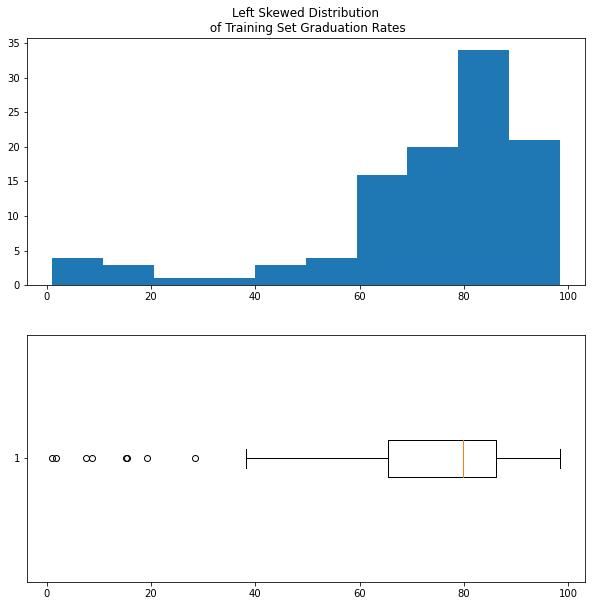

In [101]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))

ax1.hist(y_train)
ax1.set_title("Left Skewed Distribution\n of Training Set Graduation Rates")
ax2.boxplot(y_train, vert=False);

In [102]:
# Interquartile range 
import numpy as np
q25, q75 = np.percentile(y_train, [25 ,75])
print(q25,q75)

65.35 86.19999999999999


In [103]:
# 80% of the graduation rates are between 43.34 and 91.92
import numpy as np
q10, q90 = np.percentile(y_train, [10 ,90])
print(q10,q90)

48.02 92.88000000000001


In [104]:
y_train.min()

1.1

In [105]:
y_train.max()

98.3

# Independent Feature EDA

# School Counts

# Networks

All 9 networks are present in the training set.

In [115]:
X_train['Network'].unique(), X_train['Network'].unique().shape

(array(['Network 17', nan, 'Network 15', 'Charter', 'Network 16', 'ISP',
        'AUSL', 'Options', 'Contract', 'Network 14'], dtype=object),
 (10,))

Networks 14,15,16, an 17 are designate High School networks: [CPS Networks](https://www.cps.edu/schools/networks/)

The other networks are described as follows:

ISP: 
> ISP provides support to principals who can ensure continued strong performance with minimal oversight from the district, and who would benefit from additional independence to lead their schools.

AUSL: 
> The Academy for Urban School Leadership is a non-profit school management organization that leads one of the largest school networks in Chicago with 31 neighborhood Schools of Excellence.
<br><br>
Founded in 2001 as the nation’s ﬁrst teacher residency program, Academy for Urban School Leadership (AUSL) grew by transforming underperforming schools in Chicago.

Charter, Options, Contract:

> CPS charter, contract, and options schools offer students and their families alternatives to traditional public schools.

In [123]:
X_train['Network'].value_counts()

Charter       31
Network 15    16
Network 17    15
Network 16    14
Network 14    10
ISP            9
Options        5
AUSL           3
Contract       2
Name: Network, dtype: int64

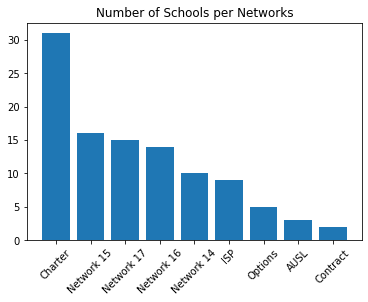

In [124]:
fig, ax = plt.subplots()

y = X_train['Network'].value_counts().values
x = X_train['Network'].value_counts().index

ax.bar(x,y)
ax.set_xticklabels(x, rotation=45);
ax.set_title('Number of Schools per Networks');

### Network NA's


In [126]:
X_train['Network'].isna().sum()

2

In [129]:
X_train[X_train['Network'].isna()]

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name_sp,Long_Name_sp,Primary_Category_sp,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,Summary,Administrator_Title,Administrator,Secondary_Contact_Title,Secondary_Contact,Address_sp,City_sp,State_sp,Zip_sp,Phone_sp,Fax_sp,CPS_School_Profile_sp,Website_sp,Facebook,Twitter,Youtube,Pinterest,Attendance_Boundaries,Grades_Offered_All,Grades_Offered,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Statistics_Description,Demographic_Description,Dress_Code,PreK_School_Day,Kindergarten_School_Day,School_Hours,Freshman_Start_End_Time,After_School_Hours,Earliest_Drop_Off_Time,Classroom_Languages,Bilingual_Services,Refugee_Services,Title_1_Eligible,PreSchool_Inclusive,Preschool_Instructional,Significantly_Modified,Hard_Of_Hearing,Visual_Impairments,Transportation_Bus,Transportation_El,Transportation_Metra,School_Latitude_sp,School_Longitude_sp,Average_ACT_School,Mean_ACT,College_Enrollment_Rate_School,College_Enrollment_Rate_Mean,Graduation_Rate_Mean,Overall_Rating,Rating_Status,Rating_Statement,Classification_Description,School_Year,Third_Contact_Title,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Network,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date,Short_Name_pr,Long_Name_pr,School_Type,Primary_Category_pr,Address_pr,City_pr,State_pr,Zip_pr,Phone_pr,Fax_pr,CPS_School_Profile_pr,Website_pr,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,Healthy_School_Certification_Description,Creative_School_Certification,Creative_School_Certification_Description,NWEA_Reading_Growth_Grade_3_Pct,NWEA_Reading_Growth_Grade_3_Lbl,NWEA_Reading_Growth_Grade_4_Pct,NWEA_Reading_Growth_Grade_4_Lbl,NWEA_Reading_Growth_Grade_5_Pct,NWEA_Reading_Growth_Grade_5_Lbl,NWEA_Reading_Growth_Grade_6_Pct,NWEA_Reading_Growth_Grade_6_Lbl,NWEA_Reading_Growth_Grade_7_Pct,NWEA_Reading_Growth_Grade_7_Lbl,NWEA_Reading_Growth_Grade_8_Pct,NWEA_Reading_Growth_Grade_8_Lbl,NWEA_Math_Growth_Grade_3_Pct,NWEA_Math_Growth_Grade_3_Lbl,NWEA_Math_Growth_Grade_4_Pct,NWEA_Math_Growth_Grade_4_Lbl,NWEA_Math_Growth_Grade_5_Pct,NWEA_Math_Growth_Grade_5_Lbl,NWEA_Math_Growth_Grade_6_Pct,NWEA_Math_Growth_Grade_6_Lbl,NWEA_Math_Growth_Grade_7_Pct,NWEA_Math_Growth_Grade_7_Lbl,NWEA_Math_Growth_Grade_8_Pct,NWEA_Math_Growth_Grade_8_Lbl,NWEA_Reading_Attainment_Grade_2_Pct,NWEA_Reading_Attainment_Grade_2_Lbl,NWEA_Reading_Attainment_Grade_3_Pct,NWEA_Reading_Attainment_Grade_3_Lbl,NWEA_Reading_Attainment_Grade_4_Pct,NWEA_Reading_Attainment_Grade_4_Lbl,NWEA_Reading_Attainment_Grade_5_Pct,NWEA_Reading_Attainment_Grade_5_Lbl,NWEA_Reading_Attainment_Grade_6_Pct,NWEA_Reading_Attainment_Grade_6_Lbl,NWEA_Reading_Attainment_Grade_7_Pct,NWEA_Reading_Attainment_Grade_7_L

## Number of students per network

In [131]:
X_train.groupby('Network').mean()['Student_Count_Total']

Network
AUSL           395.000000
Charter        603.225806
Contract       434.000000
ISP           1168.777778
Network 14    1245.900000
Network 15     656.875000
Network 16     617.785714
Network 17     562.800000
Options        248.000000
Name: Student_Count_Total, dtype: float64

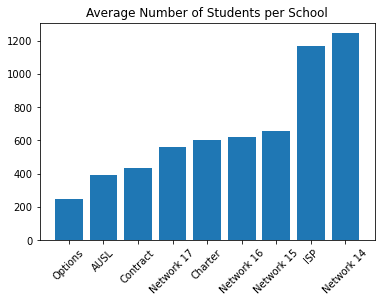

In [133]:
fig, ax = plt.subplots()

y = X_train.groupby('Network').mean()['Student_Count_Total'].sort_values().values
x = X_train.groupby('Network').mean()['Student_Count_Total'].sort_values().index

ax.bar(x,y)
ax.set_xticklabels(x, rotation=45)
ax.set_title('Average Number of Students per School');

The Options network has significantly less number of average students.  

In [134]:
X_train.groupby('Network').sum()['Student_Count_Total']

Network
AUSL           1185
Charter       18700
Contract        868
ISP           10519
Network 14    12459
Network 15    10510
Network 16     8649
Network 17     8442
Options        1240
Name: Student_Count_Total, dtype: int64

In [139]:
df_train[['Graduation_Rate_School', 'Student_Count_Total']].corr()

,Graduation_Rate_School,Student_Count_Total
Graduation_Rate_School,1.000000,0.443934
Student_Count_Total,0.443934,1.000000


There is a high positive correlation between student count and graduation rate.

Text(0.5, 1.0, 'Graduation Rate vs. Student Count Total')

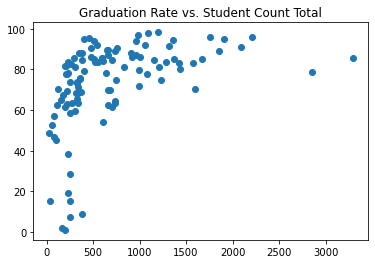

In [184]:
fig, ax = plt.subplots()

x = df_train['Student_Count_Total']
y= df_train['Graduation_Rate_School']

ax.scatter(x,y)
ax.set_title('Graduation Rate vs. Student Count Total')

In [185]:
np.corrcoef(x,y)

array([[1.       , 0.4439341],
       [0.4439341, 1.       ]])

# Log Student_Count_Total vs Log of inverse of Graduation Rate

Because Grad Rate is left skewed and Student Count is right skewed, I attempted the following log transformations
and found a high negative correlation between the log of the inverse of `Graduation Rate` and the log of `Student_Count_Total`. 

In [200]:

x = df_train['Student_Count_Total']
y= df_train['Graduation_Rate_School']

y = np.log(100-y)
x = np.log(x)

In [201]:
np.corrcoef(x, y)

array([[ 1.        , -0.59120996],
       [-0.59120996,  1.        ]])

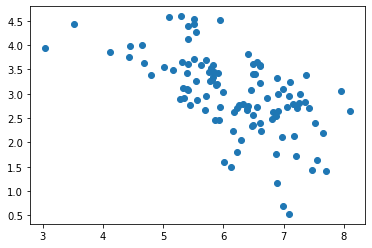

In [202]:
fig, ax = plt.subplots()

ax.scatter(x, y);

# Next Steps:

Investigate Low Income Student Counts

Investigate exactly what the two Contract Schools are.

Make a student count attribute, both for total students and for high school students.